In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

In [2]:
# Import the necessary modules
import yfinance as yf
import numpy as np
import pandas as pd
import wavy

# Read in the data
msft = yf.Ticker("MSFT")

# Get historical market data from 2005 on
hist = msft.history(period="max", start="2005-01-01")

<AxesSubplot:xlabel='Date'>

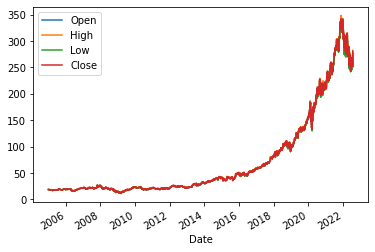

In [3]:
# Select the interest columns
hist = hist[['Open', 'High', 'Low', 'Close']]

# Plot the data
hist.plot()

In [4]:
# Calculate percent change
hist = hist.pct_change()

# Drop rows with NaN
hist.dropna(inplace=True)

In [5]:
hist.sort_index(ascending=True, inplace=True)

In [6]:
# Create panels
x, y = wavy.create_panels(hist, lookback=5, gap=0, horizon=1)

# Set train test split
wavy.set_training_split(x, y, train_size=0.8, val_size=0.1, test_size=0.1)

# y will be the Close price of the next day
y = y[['Close']]

# Convert y to boolean
y = y[['Close']] > 0

In [7]:
x.plot()

In [8]:
from wavy import models

# Create model
densemodel = models.DenseModel(x, y, model_type="classification")

2022-07-30 18:12:50.064457: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Fit model
densemodel.fit(epochs=20)

Epoch 1/20
111/111 [==============================] - 1s 4ms/step - loss: 0.6931 - auc: 0.4969 - accuracy: 0.5074 - val_loss: 0.6923 - val_auc: 0.5022 - val_accuracy: 0.5452
Epoch 2/20
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - auc: 0.5168 - accuracy: 0.5122 - val_loss: 0.6921 - val_auc: 0.5001 - val_accuracy: 0.5249
Epoch 3/20
111/111 [==============================] - 0s 2ms/step - loss: 0.6928 - auc: 0.5132 - accuracy: 0.5108 - val_loss: 0.6914 - val_auc: 0.5011 - val_accuracy: 0.5679
Epoch 4/20
111/111 [==============================] - 0s 2ms/step - loss: 0.6927 - auc: 0.5111 - accuracy: 0.5054 - val_loss: 0.6892 - val_auc: 0.5316 - val_accuracy: 0.5995
Epoch 5/20
111/111 [==============================] - 0s 2ms/step - loss: 0.6925 - auc: 0.5229 - accuracy: 0.5082 - val_loss: 0.6920 - val_auc: 0.5217 - val_accuracy: 0.5113
Epoch 6/20
111/111 [==============================] - 0s 2ms/step - loss: 0.6923 - auc: 0.5270 - accuracy: 0.5241 - val_loss: 0.68

In [10]:
# Score
densemodel.score(on='val')

,val
AUC,0.548398
accuracy,0.552036


In [13]:
# Predict
predicted = densemodel.predict(data=x.val)
predicted

,,Close
id,Date,
3534,2019-01-18,1
3535,2019-01-22,1
3536,2019-01-23,1
3537,2019-01-24,0
3538,2019-01-25,1
...,...,...
3971,2020-10-13,1
3972,2020-10-14,1
3973,2020-10-15,1
